In [1]:
import networkx as nx
import retworkx as rx
import matplotlib.pyplot as plt
import random as rd
from conjugate_gradient import conjugate_gradient_opt,conjugate_gradient_back
import sys
sys.path.append('\graph_immunization')
from network_generation import *
from vulnerability_meas import max_ev
import numpy as np
from tqdm import tqdm


In [ ]:
def simu(G):
    R_last=0
    for j in range(50):
        infected = rd.sample(G.nodes,10)
        t, S, I, R = EoN.fast_SIR(G, 0.6, 1,
                            initial_infecteds = infected)
        R_last+=R[-1]

    return R_last/(S[0]+len(infected))/50

In [8]:
N = 1000
G  = small_world(N)
#G = config_model(1000)

KeyboardInterrupt: 

In [3]:
vaccinated = conjugate_gradient_opt(G,N,exact=False)

 63%|██████▎   | 632/1000 [03:05<02:18,  2.66it/s]\\home\wemaerem$\graph_immunization\gradient_optimization\conjugate_gradient.py:30: RuntimeWarning: divide by zero encountered in true_divide
  return b_k,np.where(b_k!=0.,1/b_k/1000,0)
 81%|████████  | 808/1000 [04:24<01:24,  2.27it/s]\\home\wemaerem$\graph_immunization\gradient_optimization\conjugate_gradient.py:30: RuntimeWarning: overflow encountered in true_divide
  return b_k,np.where(b_k!=0.,1/b_k/1000,0)
100%|██████████| 1000/1000 [1:09:28<00:00,  4.17s/it]


In [4]:
print(vaccinated)

[620, 123, 110, 890, 459, 882, 341, 102, 531, 962, 732, 711, 972, 718, 612, 28, 224, 475, 944, 446, 436, 150, 131, 953, 453, 290, 726, 738, 606, 117, 915, 307, 704, 363, 350, 11, 669, 897, 694, 598, 876, 559, 335, 979, 552, 578, 935, 999, 468, 430, 989, 481, 171, 298, 592, 357, 907, 36, 231, 162, 215, 688, 18, 675, 835, 651, 537, 662, 43, 156, 314, 870, 571, 492, 640, 626, 929, 922, 57, 565, 79, 205, 585, 783, 198, 190, 63, 72, 50, 498, 177, 862, 423, 139, 96, 774, 183, 808, 86, 793, 802, 5, 682, 415, 329, 408, 632, 744, 544, 824, 320, 283, 841, 818, 371, 237, 767, 847, 757, 750, 856, 516, 525, 510, 504, 400, 243, 393, 387, 381, 276, 250, 259, 265, 903, 604, 698, 306, 909, 424, 22, 889, 543, 832, 522, 643, 656, 170, 649, 815, 474, 896, 945, 447, 591, 954, 982, 138, 222, 92, 104, 164, 965, 149, 717, 619, 66, 12, 466, 996, 111, 349, 274, 460, 374, 490, 85, 781, 787, 29, 773, 923, 417, 853, 380, 326, 213, 484, 266, 356, 938, 725, 764, 289, 197, 189, 799, 258, 365, 282, 78, 297, 613, 751, 

In [11]:
print(vaccinated)

[65, 565, 674, 727, 388, 461, 713, 373, 549, 703, 408, 720, 59, 12, 288, 366, 668, 379, 397, 972, 204, 885, 445, 186, 686, 654, 295, 597, 72, 90, 920, 931, 97, 304, 872, 83, 134, 963, 645, 897, 152, 414, 329, 311, 266, 853, 281, 662, 250, 607, 578, 878, 557, 195, 321, 733, 863, 841, 53, 180, 110, 274, 104, 847, 256, 680, 338, 891, 360, 47, 36, 171, 422, 938, 143, 742, 123, 985, 978, 116, 830, 29, 243, 159, 353, 992, 467, 346, 692, 19, 748, 638, 616, 630, 543, 572, 623, 236, 906, 438, 2, 428, 913, 454, 165, 823, 210, 754, 514, 502, 508, 522, 528, 534, 493, 815, 804, 797, 229, 476, 483, 217, 223, 589, 944, 951, 957, 791, 760, 766, 785, 777, 172, 287, 710, 469, 631, 77, 860, 406, 189, 398, 822, 834, 899, 319, 610, 386, 149, 979, 651, 11, 735, 202, 313, 644, 695, 39, 432, 579, 211, 141, 540, 550, 96, 447, 131, 258, 268, 415, 995, 559, 305, 20, 769, 969, 46, 702, 783, 331, 339, 595, 492, 921, 122, 482, 89, 726, 719, 932, 950, 854, 879, 661, 345, 244, 840, 453, 907, 158, 601, 179, 500, 516, 

In [4]:


### conjugate_grad
Gr = rx.networkx_converter(G)
eig_start = max_ev(Gr)
eigendrop = [0]
cost = [0]
n_calc=20
A= rx.adjacency_matrix(Gr)
l_index = list(range(N))
score = 0
for i in tqdm(range(0,N)):
    node = vaccinated[i]
    A = np.delete(A,l_index.index(node),0)
    A = np.delete(A,l_index.index(node),1)
    l_index.remove(node)
    eig=0
    for j in range(n_calc):
        eig += max_ev(A=A)
    eigendrop.append(eig_start-eig/n_calc)
    score+=eig/n_calc
    cost.append((i+1)/N)
print(score)

100%|██████████| 1000/1000 [00:14<00:00, 69.31it/s]

6283.885496664453


In [3]:
vacc_back = conjugate_gradient_back(G,N)

### conjugate_grad back
Gr = rx.networkx_converter(G)
eig_start = max_ev(Gr)
eig_back = [0]
cost = [0]
n_calc=20
A= rx.adjacency_matrix(Gr)
l_index = list(range(N))
score = 0
for i in tqdm(range(0,N)):
    node = vacc_back[i]
    A = np.delete(A,l_index.index(node),0)
    A = np.delete(A,l_index.index(node),1)
    l_index.remove(node)
    eig=0
    for j in range(n_calc):
        eig += max_ev(A=A)
    eig_back.append(eig_start-eig/n_calc)
    cost.append((i+1)/N)
    score+=eig/n_calc

print(score)

  0%|          | 0/1000 [00:00<?, ?it/s]\\home\wemaerem$\graph_immunization\gradient_optimization\conjugate_gradient.py:30: RuntimeWarning: divide by zero encountered in reciprocal
  return b_k,np.reciprocal(b_k)/1000
100%|██████████| 1000/1000 [00:12<00:00, 80.82it/s]

6043.095811436312


In [ ]:
## vacc random
vaccinated_rd = list(range(N))
rd.shuffle(vaccinated_rd)
eigendrop_rd = [0]
n_calc=20
score=0
for i in range(1,N+1):
    G_i = Gr.copy()
    G_i.remove_nodes_from(vaccinated_rd[:i])
    eig=0
    for j in range(n_calc):
        eig += max_ev(G_i)
    eigendrop_rd.append(eig_start-eig/n_calc)
    score+=eig/n_calc
print(score)

780.3917703653581


In [ ]:
## deg centrality no recomp

deg =  [node for (node, val) in sorted(G.degree(), key=lambda pair: pair[1])]
eigendrop_deg = [0]
n_calc=20
for i in range(1,N+1):
    G_i = Gr.copy()
    G_i.remove_nodes_from(deg[:i])
    eig=0
    for j in range(n_calc):
        eig += max_ev(G_i)
    eigendrop_deg.append(eig_start-eig/n_calc)


In [ ]:
## betweennes centrality no recomp

centr = list(nx.betweenness_centrality(G).values())
vacc_centr = np.argsort(centr)
vacc_centr = np.flip(vacc_centr)

eigendrop_cent = [0]
n_calc=20
for i in range(1,N+1):
    G_i = Gr.copy()
    G_i.remove_nodes_from(vacc_centr[:i])
    eig=0
    for j in range(n_calc):
        eig += max_ev(G_i)
    eigendrop_cent.append(eig_start-eig/n_calc)


In [ ]:
from Vaccination_select import centrality_max_recomp,deg_max

vacc_centr_r=centrality_max_recomp(G,N)
vacc_deg_r=deg_max(G,N)

eigendrop_cent_r = [0]
score = 0
for i in range(1,N+1):
    G_i = Gr.copy()
    G_i.remove_nodes_from(vacc_centr_r[:i])
    eig=0
    for j in range(n_calc):
        eig += max_ev(G_i)
    score+=eig/n_calc
    eigendrop_cent_r.append(eig_start-eig/n_calc)
print(score)

score=0
eigendrop_deg_r = [0]
for i in range(1,N+1):
    G_i = Gr.copy()
    G_i.remove_nodes_from(vacc_deg_r[:i])
    eig=0
    for j in range(n_calc):
        eig += max_ev(G_i)
    score+=eig/n_calc
    eigendrop_deg_r.append(eig_start-eig/n_calc)
print(score)




100%|██████████| 100/100 [00:00<00:00, 2019.72it/s]


747.8639953619645
724.2422957084069


In [ ]:
## ant colony
vacc_ant = np.load('ant_colony.npy').astype(int)

score=0
eigendrop_ant = [0]
for i in range(1,N+1):
    G_i = Gr.copy()
    G_i.remove_nodes_from(vacc_ant[:i])
    eig=0
    for j in range(n_calc):
        eig += max_ev(G_i)
    score+=eig/n_calc
    eigendrop_ant.append(eig_start-eig/n_calc)
print(score)


764.8293383380828


In [ ]:

np.save("ed_conj_grad_smallworld.npy",np.array([cost,eigendrop,eigendrop_rd]))

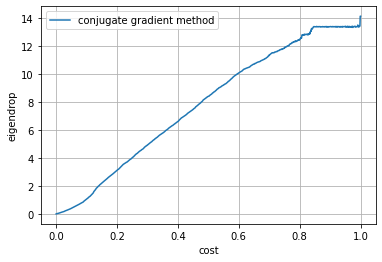

In [5]:
plt.figure(1)
plt.plot(cost,eigendrop,label="conjugate gradient method")
#plt.plot(cost,eig_back,label="conjugate gradient back")
#plt.plot(cost,grad,label="grad of the method")
#plt.plot(cost,eigendrop_rd,label="random vaccination")
#plt.plot(cost,eigendrop_deg,label="degree centrality no recomp")
#plt.plot(cost,eigendrop_cent,label="betweenness centrality no recomp")
#plt.plot(cost,eigendrop_deg_r,label="degree centrality ")
#plt.plot(cost,eigendrop_cent_r,label="betweenness centrality ")
#plt.plot(cost,eigendrop_ant,label='ant colony')
plt.grid()
plt.xlabel('cost')
plt.ylabel("eigendrop")
plt.legend()
plt.show()

In [ ]:
k=1
for i in range(1,1001):
    k*=i
s =str(k)
print(len(s))

2568
